Files already downloaded and verified
Files already downloaded and verified
Training with Original KD Loss


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 1.199565882725484, Accuracy: 35.89%, F1: 0.30835678684348433, Precision: 0.3365566933113112, Recall: 0.3589


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2, Loss: 1.1407988308488255, Accuracy: 41.42%, F1: 0.368521372349638, Precision: 0.38993688803009224, Recall: 0.4142


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3, Loss: 1.1187632581614473, Accuracy: 44.43%, F1: 0.4048494875419377, Precision: 0.4631038549068434, Recall: 0.4443
Epoch 4, Loss: 1.1036962032165674, Accuracy: 47.22%, F1: 0.4387295633930613, Precision: 0.4833758540327679, Recall: 0.4722
Epoch 5, Loss: 1.0913638646340431, Accuracy: 49.61%, F1: 0.46934791298695383, Precision: 0.5119259412255555, Recall: 0.4961
Epoch 6, Loss: 1.0787764094064913, Accuracy: 50.83%, F1: 0.48740655009934114, Precision: 0.5323761666084577, Recall: 0.5083
Epoch 7, Loss: 1.0702689043853595, Accuracy: 53.33%, F1: 0.49893534980788573, Precision: 0.5462828885506223, Recall: 0.5333
Epoch 8, Loss: 1.060708162501035, Accuracy: 54.4%, F1: 0.5253094826202479, Precision: 0.5604264586167257, Recall: 0.544
Epoch 9, Loss: 1.051672913534257, Accuracy: 57.22%, F1: 0.5462218088820336, Precision: 0.5788582359176215, Recall: 0.5722
Epoch 10, Loss: 1.046909111921135, Accuracy: 59.32%, F1: 0.5837215353732814, Precision: 0.595695434097887, Recall: 0.5932
Epoch 11, Loss: 1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 2, Loss: 1.145646881569377, Accuracy: 41.58%, F1: 0.37218275706917336, Precision: 0.41501920252069885, Recall: 0.4158


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 3, Loss: 1.1205806227596216, Accuracy: 45.15%, F1: 0.4054547821850282, Precision: 0.46972004638640263, Recall: 0.4515
Epoch 4, Loss: 1.1038031470592675, Accuracy: 45.68%, F1: 0.4166742172775853, Precision: 0.49487953158465525, Recall: 0.4568
Epoch 5, Loss: 1.0900684641602705, Accuracy: 50.97%, F1: 0.48812565050570683, Precision: 0.5123213281749192, Recall: 0.5097
Epoch 6, Loss: 1.0800794959830506, Accuracy: 52.25%, F1: 0.4985213776395799, Precision: 0.5299416072827856, Recall: 0.5225
Epoch 7, Loss: 1.0726411468385126, Accuracy: 53.64%, F1: 0.515618806727325, Precision: 0.5440226182238223, Recall: 0.5364
Epoch 8, Loss: 1.0616617968777562, Accuracy: 55.63%, F1: 0.5445603036217426, Precision: 0.565698307878864, Recall: 0.5563
Epoch 9, Loss: 1.0545152876230761, Accuracy: 58.84%, F1: 0.5725624640082186, Precision: 0.5814203386835024, Recall: 0.5884
Epoch 10, Loss: 1.0494544217196267, Accuracy: 59.03%, F1: 0.5730741304893486, Precision: 0.5840973312071904, Recall: 0.5903
Epoch 11, Loss

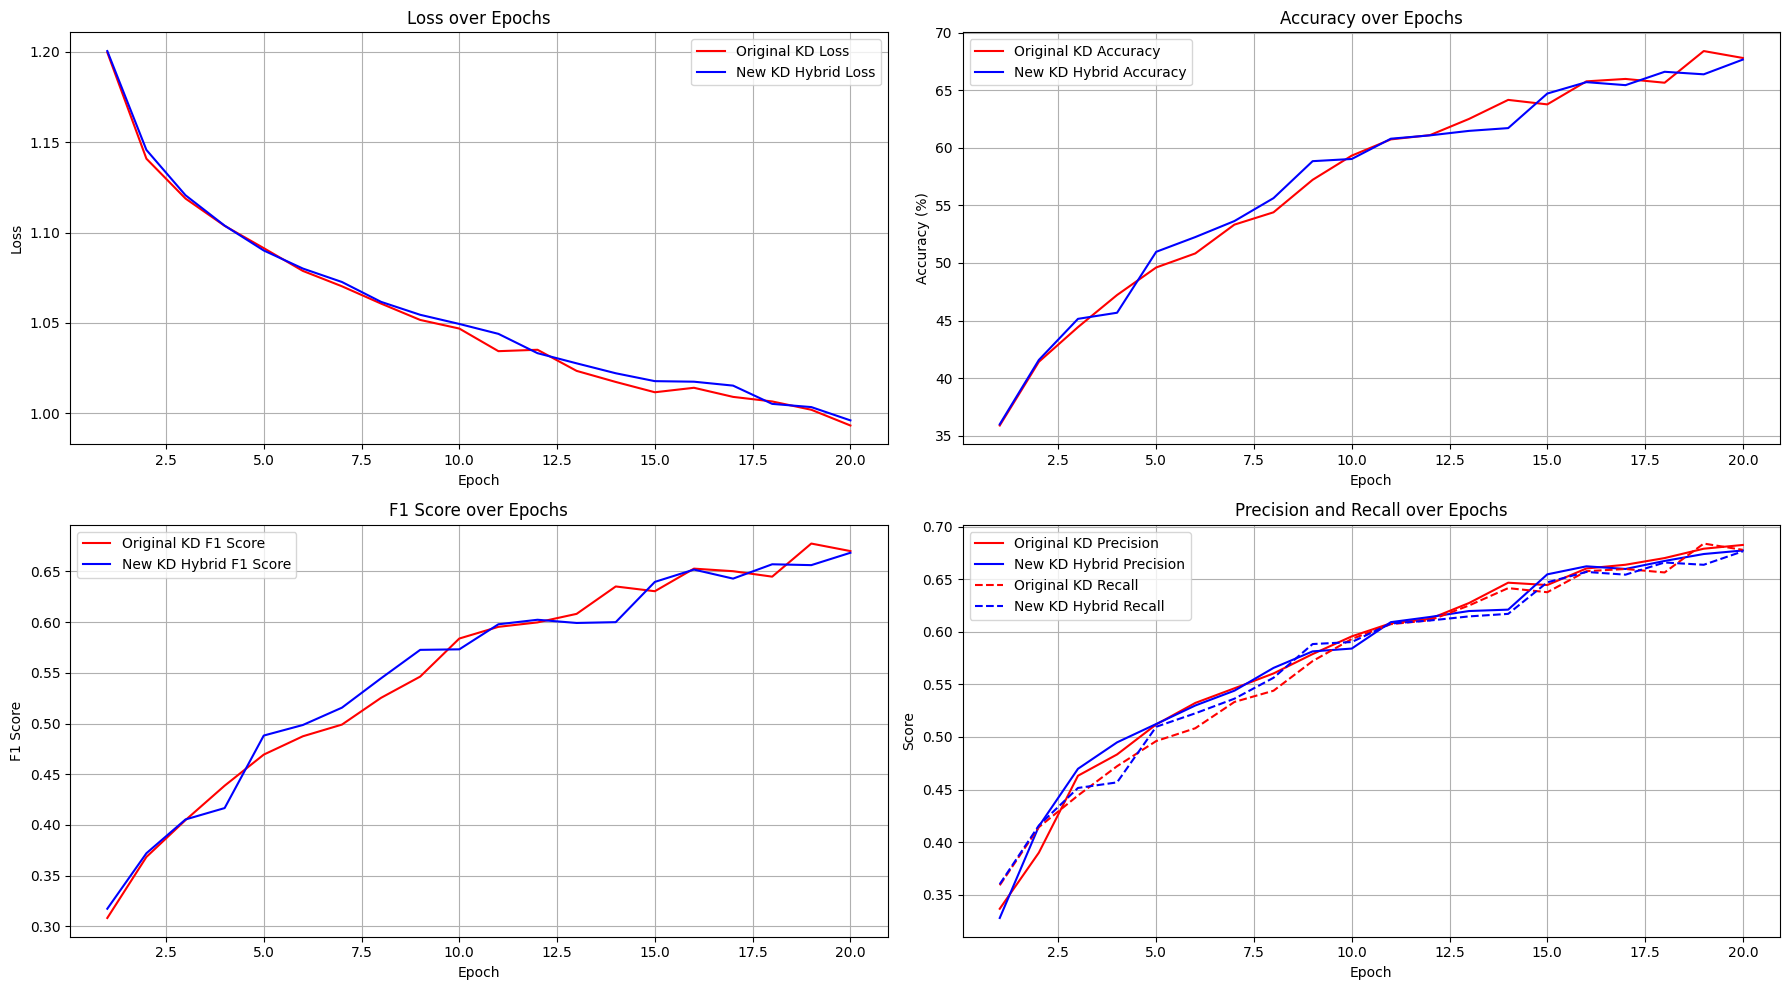

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations for the input data with augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Define models
teacher_model = models.resnet34(pretrained=True).to(device)
teacher_model.fc = nn.Linear(teacher_model.fc.in_features, 10).to(device)  # Adjust for CIFAR-10 classes

# Define a deeper student model
class DeeperStudentNet(nn.Module):
    def __init__(self):
        super(DeeperStudentNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        return self.fc3(x)

student_model_kd = DeeperStudentNet().to(device)
student_model_hybrid = DeeperStudentNet().to(device)

# Freeze teacher model parameters
for param in teacher_model.parameters():
    param.requires_grad = False

# Loss function setup
criterion = nn.CrossEntropyLoss()

# Function for calculating KD loss
def kd_loss_function(outputs, labels, teacher_outputs, T, alpha):
    soft_targets = torch.softmax(teacher_outputs / T, dim=1)
    student_log_probs = torch.log_softmax(outputs / T, dim=1)
    KD_loss = nn.KLDivLoss(reduction='batchmean')(student_log_probs, soft_targets) * (alpha * T * T) + \
              criterion(outputs, labels) * (1. - alpha)
    return KD_loss

# Function for calculating Hybrid KD loss
def kd_hybrid_loss_function(outputs, labels, teacher_outputs, T, alpha, lambda_param):
    soft_targets = torch.softmax(teacher_outputs / T, dim=1)
    student_log_probs = torch.log_softmax(outputs / T, dim=1)
    inter_class_loss = torch.mean(torch.abs(soft_targets - torch.softmax(outputs / T, dim=1)))
    KD_loss = nn.KLDivLoss(reduction='batchmean')(student_log_probs, soft_targets) * (alpha * T * T) + \
              criterion(outputs, labels) * (1. - alpha) + lambda_param * inter_class_loss
    return KD_loss

# Label smoothing
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.0, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))

# MixUp function
def mixup_data(x, y, alpha=1.0):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(device)
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def kd_mixup_criterion(criterion, pred, y_a, y_b, lam, teacher_outputs, T, alpha):
    soft_targets = torch.softmax(teacher_outputs / T, dim=1)
    student_log_probs = torch.log_softmax(pred / T, dim=1)
    kd_loss_a = nn.KLDivLoss(reduction='batchmean')(student_log_probs, soft_targets) * (alpha * T * T) + \
                criterion(pred, y_a) * (1. - alpha)
    kd_loss_b = nn.KLDivLoss(reduction='batchmean')(student_log_probs, soft_targets) * (alpha * T * T) + \
                criterion(pred, y_b) * (1. - alpha)
    return lam * kd_loss_a + (1 - lam) * kd_loss_b

def hybrid_mixup_criterion(criterion, pred, y_a, y_b, lam, teacher_outputs, T, alpha, lambda_param):
    soft_targets = torch.softmax(teacher_outputs / T, dim=1)
    student_log_probs = torch.log_softmax(pred / T, dim=1)
    inter_class_loss_a = torch.mean(torch.abs(soft_targets - torch.softmax(pred / T, dim=1)))
    inter_class_loss_b = torch.mean(torch.abs(soft_targets - torch.softmax(pred / T, dim=1)))
    kd_loss_a = nn.KLDivLoss(reduction='batchmean')(student_log_probs, soft_targets) * (alpha * T * T) + \
                criterion(pred, y_a) * (1. - alpha) + lambda_param * inter_class_loss_a
    kd_loss_b = nn.KLDivLoss(reduction='batchmean')(student_log_probs, soft_targets) * (alpha * T * T) + \
                criterion(pred, y_b) * (1. - alpha) + lambda_param * inter_class_loss_b
    return lam * kd_loss_a + (1 - lam) * kd_loss_b

# Training function with additional techniques
def train_and_evaluate(model, teacher_model, trainloader, testloader, optimizer, scheduler, loss_fn, criterion, epochs=200, T=2, alpha=0.5, lambda_param=0.1):
    teacher_model.eval()  # Teacher model in evaluation mode
    model.train()
    train_losses = []
    test_accuracies = []
    test_f1_scores = []
    test_precisions = []
    test_recalls = []

    for epoch in range(epochs):
        total_loss = 0
        for data in trainloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            # MixUp data
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)  # Adjust alpha for MixUp

            optimizer.zero_grad()
            outputs = model(inputs)
            with torch.no_grad():
                teacher_outputs = teacher_model(inputs)
            if loss_fn == kd_loss_function:
                loss = kd_mixup_criterion(criterion, outputs, targets_a, targets_b, lam, teacher_outputs, T, alpha)
            else:
                loss = hybrid_mixup_criterion(criterion, outputs, targets_a, targets_b, lam, teacher_outputs, T, alpha, lambda_param)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        scheduler.step()
        train_losses.append(total_loss / len(trainloader))

        # Test accuracy
        correct = 0
        total = 0
        all_preds = []
        all_labels = []
        model.eval()
        with torch.no_grad():
            for data in testloader:
                images, labels = data
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
        accuracy = 100 * correct / total
        f1 = f1_score(all_labels, all_preds, average='weighted')
        precision = precision_score(all_labels, all_preds, average='weighted')
        recall = recall_score(all_labels, all_preds, average='weighted')

        test_accuracies.append(accuracy)
        test_f1_scores.append(f1)
        test_precisions.append(precision)
        test_recalls.append(recall)
        model.train()

        print(f'Epoch {epoch+1}, Loss: {total_loss / len(trainloader)}, Accuracy: {accuracy}%, F1: {f1}, Precision: {precision}, Recall: {recall}')

    return train_losses, test_accuracies, test_f1_scores, test_precisions, test_recalls

# Initialize optimizer and scheduler
optimizer_kd = optim.Adam(student_model_kd.parameters(), lr=0.0001)  # Adjust learning rate
scheduler_kd = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_kd, T_max=100)
optimizer_hybrid = optim.Adam(student_model_hybrid.parameters(), lr=0.0001)  # Adjust learning rate
scheduler_hybrid = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer_hybrid, T_max=100)

# Train and evaluate with original KD loss
print("Training with Original KD Loss")
kd_losses, kd_accuracies, kd_f1_scores, kd_precisions, kd_recalls = train_and_evaluate(
    student_model_kd, teacher_model, trainloader, testloader, optimizer_kd, scheduler_kd, kd_loss_function, criterion, epochs=20, T=2, alpha=0.5
)

# Train and evaluate with hybrid KD loss
print("Training with New KD Hybrid Loss")
hybrid_losses, hybrid_accuracies, hybrid_f1_scores, hybrid_precisions, hybrid_recalls = train_and_evaluate(
    student_model_hybrid, teacher_model, trainloader, testloader, optimizer_hybrid, scheduler_hybrid, kd_hybrid_loss_function, criterion, epochs=20, T=2, alpha=0.5, lambda_param=0.1
)

# ตรวจสอบความยาวของข้อมูล
epochs_kd = len(kd_losses)
epochs_hybrid = len(hybrid_losses)
epochs = min(epochs_kd, epochs_hybrid)

# Plot results
plt.figure(figsize=(18, 10))

# Loss comparison
plt.subplot(2, 2, 1)
plt.plot(range(1, epochs+1), kd_losses[:epochs], 'r-', label='Original KD Loss')
plt.plot(range(1, epochs+1), hybrid_losses[:epochs], 'b-', label='New KD Hybrid Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy comparison
plt.subplot(2, 2, 2)
plt.plot(range(1, epochs+1), kd_accuracies[:epochs], 'r-', label='Original KD Accuracy')
plt.plot(range(1, epochs+1), hybrid_accuracies[:epochs], 'b-', label='New KD Hybrid Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

# F1 score comparison
plt.subplot(2, 2, 3)
plt.plot(range(1, epochs+1), kd_f1_scores[:epochs], 'r-', label='Original KD F1 Score')
plt.plot(range(1, epochs+1), hybrid_f1_scores[:epochs], 'b-', label='New KD Hybrid F1 Score')
plt.title('F1 Score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# Precision and Recall comparison
plt.subplot(2, 2, 4)
plt.plot(range(1, epochs+1), kd_precisions[:epochs], 'r-', label='Original KD Precision')
plt.plot(range(1, epochs+1), hybrid_precisions[:epochs], 'b-', label='New KD Hybrid Precision')
plt.plot(range(1, epochs+1), kd_recalls[:epochs], 'r--', label='Original KD Recall')
plt.plot(range(1, epochs+1), hybrid_recalls[:epochs], 'b--', label='New KD Hybrid Recall')
plt.title('Precision and Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
